# **Teoría cuántica básica, Observables y Medidas**

A continuación daremos una explicación básica pero concreta sobre los temas a tratar en este documento. 

### * *Teoría cuántica básica*  
La teoría cuántica describe el comportamiento de partículas a escalas microscópicas, donde las leyes de la mecánica clásica dejan de ser válidas. Se basa en principios como la dualidad onda-partícula, la superposición y la cuantización de ciertas magnitudes físicas.

### * *Observables*  
Son las magnitudes físicas que se pueden medir en un sistema cuántico, como la energía, la posición o el momento. Matemáticamente, los observables se representan por operadores hermíticos en un espacio de Hilbert, y sus valores posibles corresponden a los autovalores de estos operadores.

### * *Medidas*  
La medición en mecánica cuántica colapsa el estado del sistema a un estado propio del observable medido. Según la interpretación de Copenhague, antes de medir, el sistema está en una superposición de estados; tras la medición, adopta uno de los valores propios del observable con una probabilidad dada por la función de onda.

Teniendo presente lo anterior, vamos a realizar ahora son una serie de ejercicio sobre la sección 4 de libro "Quantum Computing for Computer Scientists" para reforzar y entender mejor los conceptos. 

## **EJERCICIOS**

### 1. Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

*a.*  El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

*b.*  El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [ ]:
%pip install numpy
%pip install stdin

In [6]:
# Ejercicio A 

import numpy as np
from sys import stdin

vector_datos = np.array([1, 2, 34, 5, 6])
posicion = 0
numerador = np.abs(vector_datos[posicion])**2
denominador = np.linalg.norm(vector_datos)**2

if denominador == 0:
    raise ValueError("Error por división por 0")

probabilidad = (numerador / denominador).item()
print("Punto 1:\nLa probabilidad en la posición ", posicion, "es de:", probabilidad, "%")

Punto 1:
La probabilidad en la posición  0 es de: 0.0008183306055646482 %


In [8]:
# Ejercicio B

import numpy as np

vector_original = np.array([1, 2, 3, 4, 5, 6])
posicion = 2

vector_modificado = np.array([(0 if i != posicion else vector_original[i].item()) for i in range(len(vector_original))])

print("Punto 2:\nPrimer vector:", vector_original, "\nSegundo vector", vector_modificado)

vector_original = vector_original / np.linalg.norm(vector_original)
vector_modificado = vector_modificado / np.linalg.norm(vector_modificado)

producto_interno = np.vdot(vector_modificado, vector_original)
probabilidad_transicion = (np.abs(producto_interno))**2
resultado = probabilidad_transicion.item()

print("La probabilidad de transitar del primer vector al segundo es de:", resultado, "%")

Punto 2:
Primer vector: [1 2 3 4 5 6] 
Segundo vector [0 0 3 0 0 0]
La probabilidad de transitar del primer vector al segundo es de: 0.0989010989010989 %


### 2. Complete los retos de programación del capítulo 4.

*a.* Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

*b.* Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

*c.* El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

*d.* Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [ ]:
# Ejercicio A

import numpy as np

vector_estado_inicial = np.array([1, 0, 0])  # Estado cuántico inicial
vector_estado_final = np.array([0, 0, 1])  # Estado cuántico final

# Cálculo del producto interno entre los estados
amplitud_transicion = np.vdot(vector_estado_final, vector_estado_inicial)

# Cálculo de la probabilidad de transición después de la observación
probabilidad_transicion = np.abs(amplitud_transicion)**2

print("La probabilidad de transición es:", probabilidad_transicion)

La probabilidad de transición es: 0


In [14]:
# Ejercicio B

import numpy as np

def calcular_media_varianza(matriz_observable, vector_estado):
    # Comprobar si la matriz es hermítica
    if not np.allclose(matriz_observable, matriz_observable.conj().T):
        return "La matriz observable no es hermítica"

    # Cálculo de la media
    valor_esperado = np.dot(vector_estado.conj().T, np.dot(matriz_observable, vector_estado)).real

    # Cálculo de la varianza
    estado_transformado = np.dot(matriz_observable, vector_estado)
    varianza = np.dot(vector_estado.conj().T, np.dot(matriz_observable, estado_transformado)).real - valor_esperado ** 2

    return valor_esperado, varianza

# Definición del observable y el ket
matriz_observable = np.array([[1, 1j], [-1j, 2]])  
vector_estado = np.array([np.sqrt(2)/2, np.sqrt(2)/2j])

# Cálculo de la media y varianza
media, varianza = calcular_media_varianza(matriz_observable, vector_estado)

# Impresión de resultados
print("La media del observable es:", media.item())
print("La varianza del observable es:", varianza.item())


La media del observable es: 2.5000000000000004
La varianza del observable es: 0.25


In [15]:
# Ejercicio C

import numpy as np

def calcular_probabilidad_transicion(matriz_observable, vector_estado):
    # Calcula los valores y vectores propios de la matriz observable
    valores_propios, vectores_propios = np.linalg.eig(matriz_observable)

    # Calcula las probabilidades de transición a los vectores propios
    probabilidades_transicion = np.abs(np.dot(vectores_propios.conj().T, vector_estado)) ** 2

    return valores_propios, probabilidades_transicion

# Definición del observable y el ket
matriz_observable = np.array([[1, 0], [0, -1]])  # Matriz hermítica de ejemplo
vector_estado = np.array([[1], [0]])  # Vector ket de ejemplo

# Cálculo de los valores propios y probabilidades de transición
valores_propios, probabilidades_transicion = calcular_probabilidad_transicion(matriz_observable, vector_estado)

# Impresión de resultados
print("Valores propios del observable:", valores_propios)
print("Probabilidades de transición a los vectores propios:", probabilidades_transicion)


Valores propios del observable: [ 1. -1.]
Probabilidades de transición a los vectores propios: [[1.]
 [0.]]


In [16]:
# Ejercicio D

import numpy as np

def aplicar_transformaciones_cuánticas(estado_inicial, lista_matrices_unitarias):
    estado_actual = estado_inicial
    for matriz_unitaria in lista_matrices_unitarias:
        estado_actual = np.dot(matriz_unitaria, estado_actual)
    return estado_actual

# Definición del estado inicial y matrices unitarias
estado_inicial = np.array([1, 0])  
matrices_unitarias = [
    np.array([[0, 1], [1, 0]]),  # Matriz de Pauli X (puerta NOT cuántica)
    np.array([[1, 0], [0, 1]])   # Matriz identidad (no cambia el estado)
]

# Cálculo del estado final
estado_final = aplicar_transformaciones_cuánticas(estado_inicial, matrices_unitarias)

# Impresión del resultado
print("El estado final del sistema es:", estado_final)

El estado final del sistema es: [0 1]


### 3. Realice los siguientes problemas e incluyalos como ejemplos

Modele en su librería los problemas

* 4.3.1
* 4.3.2
* 4.4.1
* 4.4.2

Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3

### Ejercicio 4.3.1

Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.

In [17]:
import numpy as np

# Definición del estado inicial |ψ⟩ = |0⟩ (spin up en la base estándar)
estado_inicial = np.array([1, 0])

# Matriz de Pauli σx (operador de cambio de spin)
matriz_sigma_x = np.array([[0, 1], [1, 0]])

# Aplicación de σx al estado inicial
estado_resultante = np.dot(matriz_sigma_x, estado_inicial)

# Cálculo de probabilidades de transición
probabilidad_spin_up = abs(estado_resultante[0])**2
probabilidad_spin_down = abs(estado_resultante[1])**2

# Impresión de resultados
print("Probabilidad de transición a estado |0⟩ (spin up):", probabilidad_spin_up)
print("Probabilidad de transición a estado |1⟩ (spin down):", probabilidad_spin_down)

Probabilidad de transición a estado |0⟩ (spin up): 0
Probabilidad de transición a estado |1⟩ (spin down): 1


#### Ejercicio 4.3.2

Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

Probabilidad de transición a estado |0⟩ (spin up): 0.0
Probabilidad de transición a estado |1⟩ (spin down): 1.0


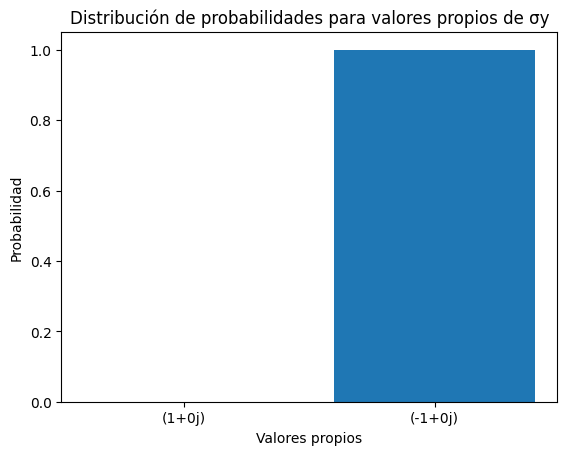

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definición del estado inicial |ψ⟩ = |0⟩ (spin up en la base estándar)
estado_inicial = np.array([1, 0])

# Matriz de Pauli σy
matriz_sigma_y = np.array([[0, -1j], [1j, 0]])

# Aplicación de σy al estado inicial
estado_resultante = np.dot(matriz_sigma_y, estado_inicial)

# Cálculo de probabilidades de transición
probabilidad_spin_up = abs(estado_resultante[0])**2
probabilidad_spin_down = abs(estado_resultante[1])**2

# Impresión de resultados
print("Probabilidad de transición a estado |0⟩ (spin up):", probabilidad_spin_up)
print("Probabilidad de transición a estado |1⟩ (spin down):", probabilidad_spin_down)

# Cálculo de valores propios para graficar
valores_propios, _ = np.linalg.eig(matriz_sigma_y)

# Gráfico de distribución de probabilidades
plt.bar(np.arange(len(valores_propios)), abs(estado_resultante)**2)
plt.xticks(np.arange(len(valores_propios)), np.round(valores_propios, 2))
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidades para valores propios de σy')
plt.show()

### Ejercicio 4.4.1

Verify that  
$$ U_1 = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$  
and  
$$ U_2 = \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} $$  
are unitary matrices.  

Multiply them and verify that their product is also unitary.  



In [19]:
import numpy as np

# Definición de las matrices unitarias
matriz_U1 = np.array([[0, 1], [1, 0]])
matriz_U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

# Verificación de unitariedad de U1 y U2
es_unitaria_U1 = "es" if np.allclose(np.dot(matriz_U1.conj().T, matriz_U1), np.eye(2)) else "no es"
es_unitaria_U2 = "es" if np.allclose(np.dot(matriz_U2.conj().T, matriz_U2), np.eye(2)) else "no es"

# Producto de U1 y U2
producto_U1_U2 = np.dot(matriz_U1, matriz_U2)

# Verificación de unitariedad del producto
es_unitaria_producto = "es" if np.allclose(np.dot(producto_U1_U2.conj().T, producto_U1_U2), np.eye(2)) else "no es"

# Impresión de resultados
print("La matriz U1", es_unitaria_U1, "unitaria.")
print("La matriz U2", es_unitaria_U2, "unitaria.")
print("El producto de U1 y U2", es_unitaria_producto, "unitario.")

La matriz U1 es unitaria.
La matriz U2 es unitaria.
El producto de U1 y U2 es unitario.


In [20]:
import numpy as np

# Definición del operador de evolución (mapa cuántico)
operador_evolucion = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

# Estado inicial del sistema
estado_inicial = np.array([1, 0, 0, 0])

# Evolución del estado tras 3 iteraciones del operador
estado_despues_tres_pasos = np.linalg.matrix_power(operador_evolucion, 3) @ estado_inicial

# Cálculo de la probabilidad de encontrar la partícula en el tercer punto
probabilidad_en_punto_3 = np.abs(estado_despues_tres_pasos[2])**2

# Impresión de resultados
print("El estado del sistema después de 3 pasos de tiempo es:", estado_despues_tres_pasos)
print("Probabilidad de encontrar la partícula en el punto 3:", probabilidad_en_punto_3)

El estado del sistema después de 3 pasos de tiempo es: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la partícula en el punto 3: 0.0


## Segunda Parte

Desarrolle e incluya en el Github una discusión de los ejercicios


## Ejercicio 4.5.2  

Write down the generic state vector for the system of two particles with spin. Generalize it to a system with n particles (this is important: it will be the physical realization for quantum registers!).  

### **Respuesta:**  

Para un sistema compuesto por dos partículas con espín, el vector de estado general, denotado como $$|\Psi\rangle $$, se obtiene mediante el producto tensorial de los estados individuales:  

$$
|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle
$$  

Este concepto se extiende a un sistema con \( n \) partículas, aplicando el producto tensorial a todos los estados individuales:  

$$
|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle \otimes \dots \otimes |\psi_n\rangle
$$  

## Ejercicio 4.5.3  

Assume the same scenario as in Example 4.5.2 and let

$$
|\alpha\rangle \otimes |\beta\rangle = (a|x_0\rangle + b|x_1\rangle) \otimes (c|y_0\rangle + d|y_1\rangle)
$$  

Is this state separable? 

### **Respuesta:**  

Expresamos $$ |\phi\rangle $$ en términos de la base:  

$$
|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_0\rangle
$$  

Intentamos escribir esto como un producto tensorial de dos estados. Buscaremos estados $ |\alpha\rangle $ y $ |\beta\rangle $ tales que:  

$$
|\alpha\rangle \otimes |\beta\rangle = (a|x_0\rangle + b|x_1\rangle) \otimes (c|y_0\rangle + d|y_1\rangle)
$$  

Expandiendo el producto tensorial, obtenemos:  

$$
|\alpha\rangle \otimes |\beta\rangle = ac |x_0\rangle \otimes |y_0\rangle + ad |x_0\rangle \otimes |y_1\rangle + bc |x_1\rangle \otimes |y_0\rangle + bd |x_1\rangle \otimes |y_1\rangle
$$  

Comparando esto con la expresión para $ |\phi\rangle $, podemos ver que no es posible encontrar coeficientes $ a, b, c $ y $ d $ de manera que ambas expresiones sean iguales.  

Por lo tanto, el estado $ |\phi\rangle $ dado por la ecuación no es separable, lo que significa que está entrelazado.
